In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv("alge.csv")

In [65]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [66]:
df.columns


Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')

In [67]:
df.drop(['index','day', 'month', 'year'], axis=1, inplace=True)


In [68]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [69]:
df['Classes'].value_counts()

Classes
fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [70]:
## Encoding

df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [71]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [72]:
df['Classes'].value_counts()


Classes
1    137
0    104
Name: count, dtype: int64

In [73]:
## independet and dependent feature
X= df.drop('FWI', axis =1 )
Y = df['FWI']

In [74]:
X,Y

(     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
 0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
 1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
 2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
 3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
 4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
 ..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
 236           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
 237           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
 238           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
 239           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
 240           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1
 
 [241 rows x 11 columns],
 0      0.5
 1      0.4
 2      0.1


In [75]:
# train test spit

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [76]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((180, 11), (61, 11), (180,), (61,))

In [77]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658884,-0.283527,-0.329838,0.695701,0.490708,0.368994,0.609129,0.461458,0.529054,0.254575
RH,-0.658884,1.000000,0.255366,0.218938,-0.636912,-0.383872,-0.201891,-0.687823,-0.330053,-0.429008,-0.388707
Ws,-0.283527,0.255366,1.000000,0.315301,-0.191422,-0.012974,0.078715,0.009717,0.020902,-0.088843,-0.199183
Rain,-0.329838,0.218938,0.315301,1.000000,-0.532895,-0.266456,-0.284452,-0.324347,-0.277710,-0.343453,-0.104973
FFMC,0.695701,-0.636912,-0.191422,-0.532895,1.000000,0.598514,0.504184,0.733343,0.584447,0.763900,0.266560
DMC,0.490708,-0.383872,-0.012974,-0.266456,0.598514,1.000000,0.878344,0.665321,0.984121,0.589805,0.207122
DC,0.368994,-0.201891,0.078715,-0.284452,0.504184,0.878344,1.000000,0.508745,0.947259,0.502396,-0.084035
ISI,0.609129,-0.687823,0.009717,-0.324347,0.733343,0.665321,0.508745,1.000000,0.628279,0.727029,0.282773
BUI,0.461458,-0.330053,0.020902,-0.277710,0.584447,0.984121,0.947259,0.628279,1.000000,0.578800,0.104204
Classes,0.529054,-0.429008,-0.088843,-0.343453,0.763900,0.589805,0.502396,0.727029,0.578800,1.000000,0.203781


<Axes: >

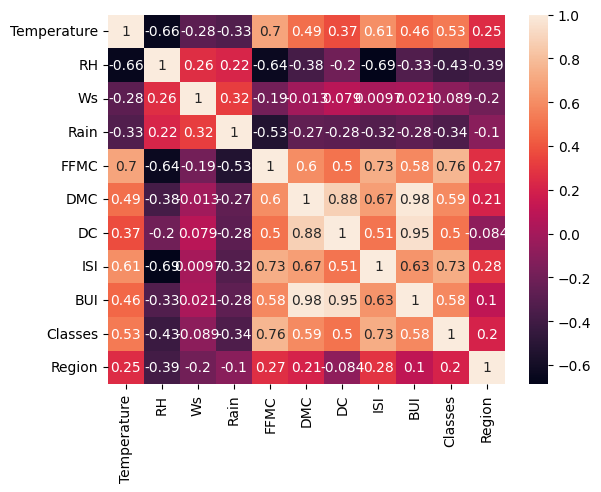

In [78]:
sns.heatmap(X_train.corr(), annot=True)

In [79]:
# # Check for multi colenierity

# plt.figure(figsize= ())

In [80]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [81]:
# threashold domain experties
corf= correlation(X_train, 0.85)

In [82]:
## drop the features when corr is more hen 0.85
X_train.drop(corf, axis=1, inplace=True)
X_test.drop(corf, axis=1, inplace=True)

In [83]:
X_train.shape, X_test.shape

((180, 9), (61, 9))

In [84]:
# feature scaling or standardization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [85]:
X_train_sc

array([[-0.82582663,  0.76875417,  1.25919129, ..., -0.62417554,
        -1.11803399, -0.97801929],
       [-0.03373714, -0.48680422, -0.57458243, ...,  0.06950049,
         0.89442719,  1.02247472],
       [ 2.07850149, -2.07277271, -0.20782769, ...,  2.84420462,
         0.89442719,  1.02247472],
       ...,
       [-1.88194595,  0.90091821,  0.5256818 , ..., -1.07865294,
        -1.11803399, -0.97801929],
       [ 1.286412  , -0.48680422, -0.20782769, ...,  0.85885598,
         0.89442719,  1.02247472],
       [-0.5617968 ,  0.96700023,  1.99270077, ..., -0.86337417,
        -1.11803399, -0.97801929]], shape=(180, 9))

Text(0.5, 1.0, 'after standardization')

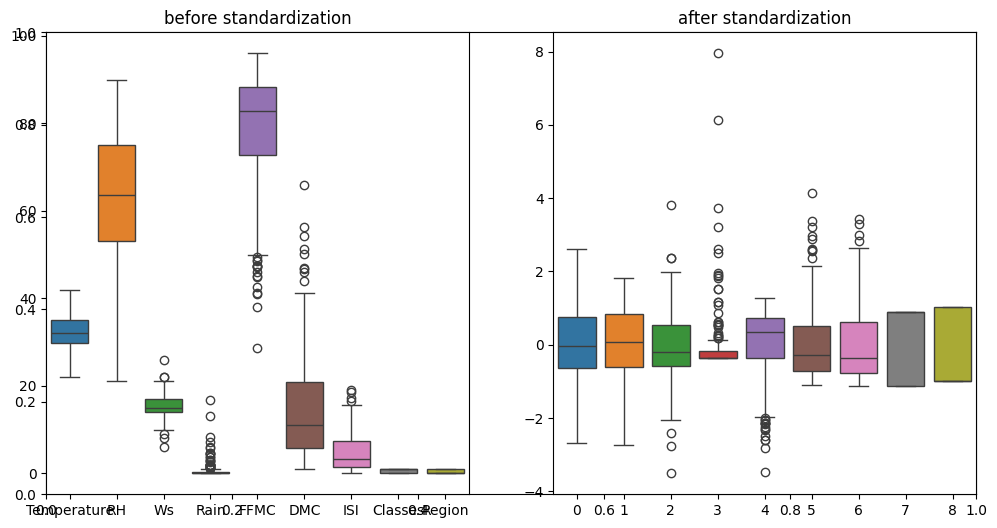

In [86]:
## boxplot to understand the effect of standard scala

plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("before standardization")

plt.subplot(1,2,2)
sns.boxplot(X_train_sc)
plt.title("after standardization")

In [87]:
## linear regression

model = LinearRegression()
model.fit(X_train_sc, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [95]:
y_pred = model.predict(X_test_sc )

In [96]:
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

r2, mse, mae

(0.9836843464471655, 0.9234694988901772, 0.6612623700751249)

Text(0, 0.5, 'y_pred')

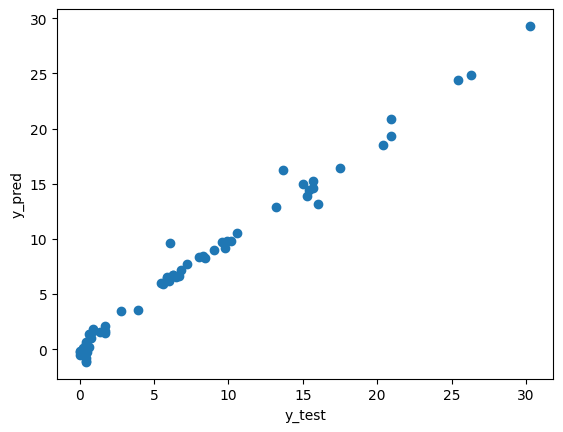

In [98]:
plt.scatter(Y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")



In [99]:
# lasso regression

from sklearn import linear_model

lasso = linear_model.Lasso()
lasso.fit(X_train_sc, Y_train)
y_pred = lasso.predict(X_test_sc)
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

r2, mse, mae

(0.9473075426805143, 2.982404412948803, 1.2522655115292307)

Text(0, 0.5, 'y_pred')

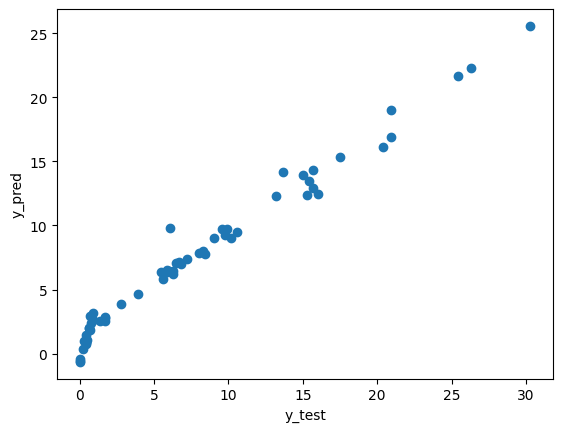

In [100]:
plt.scatter(Y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")



In [101]:
# ridge

from sklearn import linear_model

ridge = linear_model.Ridge()
ridge.fit(X_train_sc, Y_train)
y_pred = ridge.predict(X_test_sc)
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

r2, mse, mae

(0.9830258655702742, 0.9607396580929614, 0.6864171979933394)

Text(0, 0.5, 'y_pred')

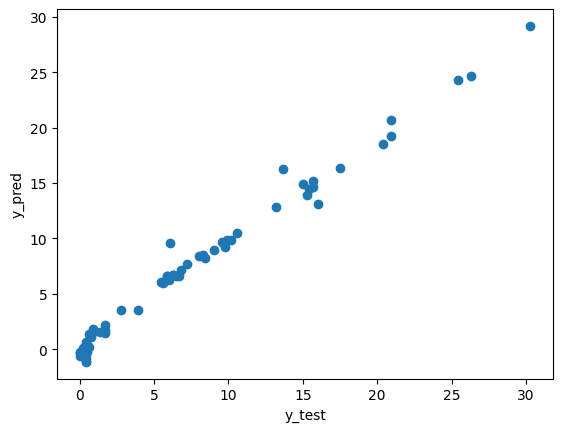

In [102]:
plt.scatter(Y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")



In [103]:
## elasticNet

from sklearn import linear_model

elastic = linear_model.ElasticNet()
elastic.fit(X_train_sc, Y_train)
y_pred = elastic.predict(X_test_sc)
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

r2, mse, mae

(0.8823512748789928, 6.6589431358506435, 1.924851265262548)

Text(0, 0.5, 'y_pred')

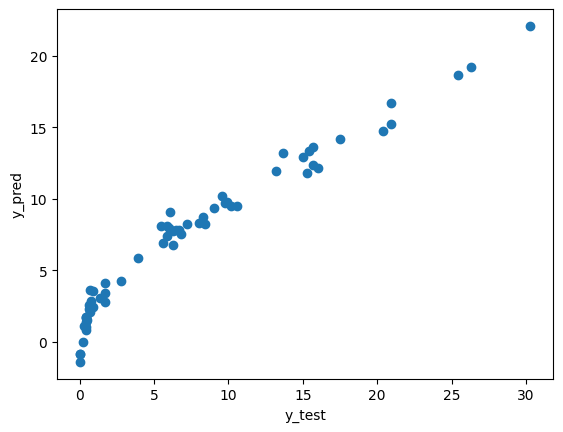

In [104]:
plt.scatter(Y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")



In [107]:
## lassoCV

from sklearn import linear_model

lasso = linear_model.LassoCV(cv = 5)
lasso.fit(X_train_sc, Y_train)
y_pred = lasso.predict(X_test_sc)
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

r2, mse, mae

(0.9821332486161064, 1.0112619696079013, 0.7168099827460882)

In [109]:
lasso.alpha_

np.float64(0.05882457722056596)

Text(0, 0.5, 'y_pred')

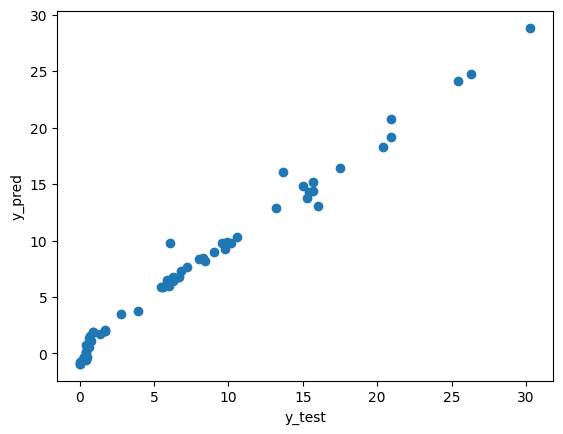

In [108]:
plt.scatter(Y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")



In [110]:
## ridgeCV

from sklearn import linear_model

ridge = linear_model.RidgeCV(cv = 5)
ridge.fit(X_train_sc, Y_train)
y_pred = ridge.predict(X_test_sc)
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

r2, mse, mae

(0.9756362083772786, 1.378995843963017, 0.888459893163532)

In [112]:
ridge.alpha_

np.float64(10.0)

In [113]:
ridge.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

Text(0, 0.5, 'y_pred')

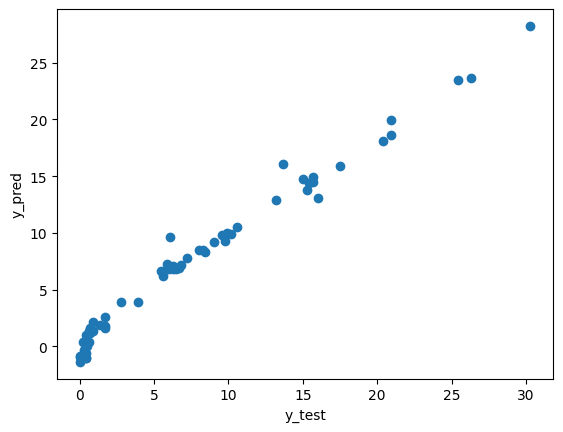

In [111]:
plt.scatter(Y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")



In [114]:
## elaticNetCV

from sklearn import linear_model

elastic = linear_model.ElasticNetCV(cv = 5)
elastic.fit(X_train_sc, Y_train)
y_pred = elastic.predict(X_test_sc)
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

r2, mse, mae

(0.9811284001563361, 1.0681366084692703, 0.7523532380645859)

Text(0, 0.5, 'y_pred')

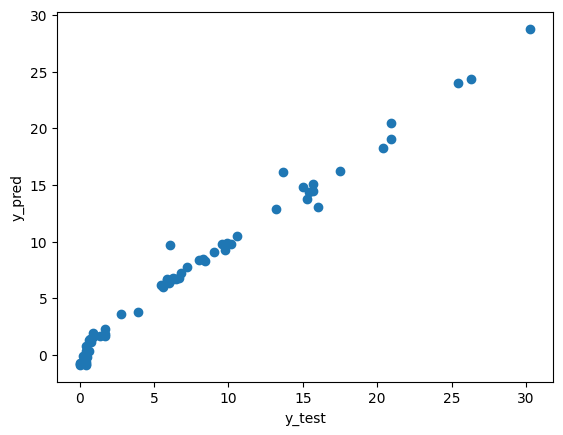

In [115]:
plt.scatter(Y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")



In [116]:
elastic.alpha_


np.float64(0.03852479401884811)